## Model Training

In [721]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
            images.append(img)
    return images

folder_paths = ['./train/bird', './train/deer', './train/dog']
class_labels = {'bird': 0, 'deer': 1, 'dog': 2}

x_train = []
y_train = []

for folder_path in folder_paths:
    class_name = os.path.basename(folder_path)
    class_id = class_labels[class_name]
    images = load_images_from_folder(folder_path)

    x_train.extend(images)
    y_train.extend([class_id] * len(images))

x_train = np.array(x_train)
y_train = np.array(y_train)

x_train = x_train.astype('float32') / 255.0

print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")

print(f"Sample labels: {y_train[:10]}")

checkpoint_path = "best_model.tf"
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max', save_weights_only=False)

model = keras.Sequential([
    # Block 1
    Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(64,64,3)),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

    # Block 2
    Conv2D(128, (3,3), activation='relu', padding='same'),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

    # Block 3
    Conv2D(256, (3,3), activation='relu', padding='same'),
    Conv2D(256, (3,3), activation='relu', padding='same'),
    Conv2D(256, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

    # Block 4
    Conv2D(512, (3,3), activation='relu', padding='same'),
    Conv2D(512, (3,3), activation='relu', padding='same'),
    Conv2D(512, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

    # Block 5
    Conv2D(512, (3,3), activation='relu', padding='same'),
    Conv2D(512, (3,3), activation='relu', padding='same'),
    Conv2D(512, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

    Flatten(),
    Dense(4096, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=20,  batch_size=32, shuffle=True, validation_split=0.1, callbacks=[checkpoint])


x_train shape: (15000, 64, 64, 3)
y_train shape: (15000,)
Sample labels: [0 0 0 0 0 0 0 0 0 0]
Epoch 1/20
422/422 [==============================] - ETA: 0s - loss: 1.0882 - accuracy: 0.3733
Epoch 1: val_accuracy improved from -inf to 0.00000, saving model to best_model.tf
INFO:tensorflow:Assets written to: best_model.tf/assets


INFO:tensorflow:Assets written to: best_model.tf/assets


422/422 [==============================] - 367s 869ms/step - loss: 1.0882 - accuracy: 0.3733 - val_loss: 1.3170 - val_accuracy: 0.0000e+00
Epoch 2/20
422/422 [==============================] - ETA: 0s - loss: 1.0849 - accuracy: 0.3790
Epoch 2: val_accuracy did not improve from 0.00000
422/422 [==============================] - 362s 857ms/step - loss: 1.0849 - accuracy: 0.3790 - val_loss: 1.3526 - val_accuracy: 0.0000e+00
Epoch 3/20
422/422 [==============================] - ETA: 0s - loss: 1.0829 - accuracy: 0.3953
Epoch 3: val_accuracy did not improve from 0.00000
422/422 [==============================] - 361s 856ms/step - loss: 1.0829 - accuracy: 0.3953 - val_loss: 1.3223 - val_accuracy: 0.0000e+00
Epoch 4/20
422/422 [==============================] - ETA: 0s - loss: 1.0722 - accuracy: 0.4145
Epoch 4: val_accuracy improved from 0.00000 to 0.26000, saving model to best_model.tf
INFO:tensorflow:Assets written to: best_model.tf/assets


INFO:tensorflow:Assets written to: best_model.tf/assets


422/422 [==============================] - 368s 872ms/step - loss: 1.0722 - accuracy: 0.4145 - val_loss: 1.1243 - val_accuracy: 0.2600
Epoch 5/20
422/422 [==============================] - ETA: 0s - loss: 1.0227 - accuracy: 0.4733
Epoch 5: val_accuracy improved from 0.26000 to 0.75000, saving model to best_model.tf
INFO:tensorflow:Assets written to: best_model.tf/assets


INFO:tensorflow:Assets written to: best_model.tf/assets


422/422 [==============================] - 376s 890ms/step - loss: 1.0227 - accuracy: 0.4733 - val_loss: 0.6211 - val_accuracy: 0.7500
Epoch 6/20
422/422 [==============================] - ETA: 0s - loss: 0.9766 - accuracy: 0.5027
Epoch 6: val_accuracy did not improve from 0.75000
422/422 [==============================] - 367s 870ms/step - loss: 0.9766 - accuracy: 0.5027 - val_loss: 0.9519 - val_accuracy: 0.5460
Epoch 7/20
422/422 [==============================] - ETA: 0s - loss: 0.9444 - accuracy: 0.5296
Epoch 7: val_accuracy did not improve from 0.75000
422/422 [==============================] - 366s 866ms/step - loss: 0.9444 - accuracy: 0.5296 - val_loss: 1.1765 - val_accuracy: 0.4447
Epoch 8/20
422/422 [==============================] - ETA: 0s - loss: 0.9230 - accuracy: 0.5441
Epoch 8: val_accuracy improved from 0.75000 to 0.82867, saving model to best_model.tf
INFO:tensorflow:Assets written to: best_model.tf/assets


INFO:tensorflow:Assets written to: best_model.tf/assets


422/422 [==============================] - 361s 855ms/step - loss: 0.9230 - accuracy: 0.5441 - val_loss: 0.5582 - val_accuracy: 0.8287
Epoch 9/20
422/422 [==============================] - ETA: 0s - loss: 0.9032 - accuracy: 0.5582
Epoch 9: val_accuracy did not improve from 0.82867
422/422 [==============================] - 360s 854ms/step - loss: 0.9032 - accuracy: 0.5582 - val_loss: 0.8869 - val_accuracy: 0.5953
Epoch 10/20
422/422 [==============================] - ETA: 0s - loss: 0.8869 - accuracy: 0.5725
Epoch 10: val_accuracy did not improve from 0.82867
422/422 [==============================] - 363s 861ms/step - loss: 0.8869 - accuracy: 0.5725 - val_loss: 0.7945 - val_accuracy: 0.6627
Epoch 11/20
422/422 [==============================] - ETA: 0s - loss: 0.8658 - accuracy: 0.5862
Epoch 11: val_accuracy did not improve from 0.82867
422/422 [==============================] - 365s 865ms/step - loss: 0.8658 - accuracy: 0.5862 - val_loss: 0.6468 - val_accuracy: 0.7473
Epoch 12/20
422

# Model Evaluation

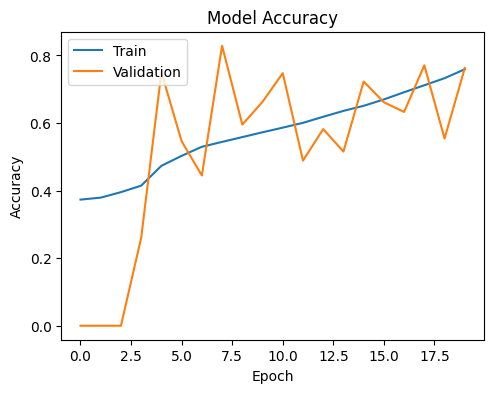

In [723]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [722]:
model.save("dog_bird_deer.keras")

In [724]:
model_loaded = tf.keras.models.load_model('best_model.tf')

In [725]:
model_loaded.evaluate(x_train, y_train)

469/469 [==============================] - 108s 231ms/step - loss: 0.9405 - accuracy: 0.5431


[0.9404658079147339, 0.543066680431366]

# Object Detection

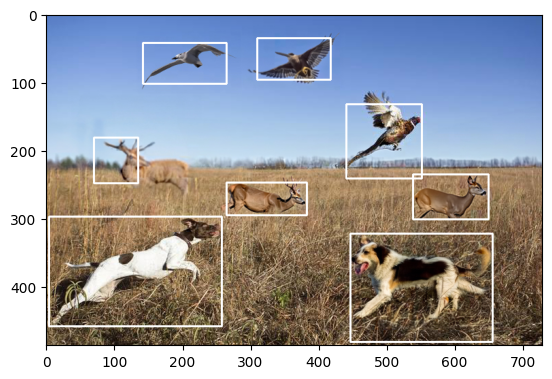

In [92]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("./dog_bird_deer.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

#Gaussian blur
blurred = cv2.GaussianBlur(gray, (11, 11), 0)

edges = cv2.Canny(blurred, 60, 144)

dilated_edges = cv2.dilate(edges, None, iterations=2)

# Find contours
contours, _ = cv2.findContours(dilated_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

max_area = 850  # Adjust as needed
for contour in contours:
    if cv2.contourArea(contour) > max_area:
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 255, 255), 2)

# Show the image with bounding boxes
plt.imshow(img)
plt.show()


# Classification of Detected Objects

1/1 [==============================] - 0s 23ms/step


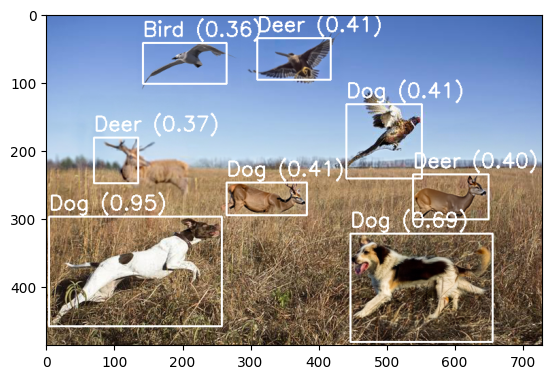

In [93]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# load model 
model = tf.keras.models.load_model('./best_model.tf/')

font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 1
color = (255, 255, 255) 
thickness = 2

# Iterate bounding boxes
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    if cv2.contourArea(contour) > max_area:

        roi = img[y:y+h, x:x+w]

        roi = cv2.resize(roi, (64, 64))  
        roi = cv2.cvtColor(roi, cv2.COLOR_RGB2BGR) 
        roi = roi / 255.0  
        roi = np.expand_dims(roi, axis=0)

        predictions = model.predict(roi)

        class_index = np.argmax(predictions)
        class_label = "Unknown" 
        if class_index == 0:
            class_label = "Bird"
        elif class_index == 1:
            class_label = "Deer"
        elif class_index == 2:
            class_label = "Dog"

        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 255, 255), 2)
        
        text = f"{class_label} ({predictions[0, class_index]:.2f})"
        position = (x, y - 10) 
        cv2.putText(img, text, position, font, font_scale, color, thickness)

plt.imshow(img)
plt.show()
